# Training4

In this notebook file, FirstQuarter-FaceOnly dataset will be read from pkl file.

Input(X) and Output(Y) numpy arrays will be created from pandas dataframes.

The MobileNetV2 model will be loaded with random weights so only the architecture of the MobileNetV2 model will be used for training.

A keras utils Sequence class will be defined so that operations can be performed on the data to be used during the training.

Performance will be checked with Validation data while training model with Augmented Training data.

Accuracy and Loss charts will be drawn according to epoch numbers.

The results obtained by evaluating the model with Test data will be printed.

In [1]:
#Libraries are being imported
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Library versions are being printed
print('numpy Version: ' + np.__version__)
print('pandas Version: ' + pd.__version__)
print('tensorflow Version: ' + tf.__version__)
print('matplotlib Version: ' + matplotlib.__version__)

numpy Version: 1.22.3
pandas Version: 1.4.3
tensorflow Version: 2.6.0
matplotlib Version: 3.5.2


In [3]:
#GPU will be used for training
myGPU = tf.test.gpu_device_name()
if myGPU:
    print(myGPU)
else:
    print("Error")

/device:GPU:0


In [4]:
#Person dataframe in FirstQuarter is being read from pkl file
personDf = pd.read_pickle("../../../Data/FirstQuarter/Person.pkl")
personDf

,Name
ID,
0,Ahmed Chalabi
1,Ai Sugiyama
2,Alan Greenspan
3,Alastair Campbell
4,Allyson Felix
...,...
107,Wayne Ferreira
108,William Macy
109,Woody Allen


In [5]:
#FaceOnly Training data is being read from pkl file
trainingDf = pd.read_pickle("../../../Data/FirstQuarter/FaceOnly/Training.pkl")
trainingDf

,PersonID,ImageBGR,DetectionType
0,95,"[[[177, 199, 204], [176, 199, 204], [175, 200,...",SingleFace
1,63,"[[[113, 123, 100], [113, 123, 100], [112, 122,...",SingleFace
2,94,"[[[50, 80, 91], [50, 80, 91], [49, 79, 90], [4...",SingleFace
3,10,"[[[122, 123, 114], [124, 125, 116], [128, 129,...",SingleFace
4,101,"[[[90, 109, 124], [92, 110, 126], [95, 113, 13...",SingleFace
...,...,...,...
443,55,"[[[35, 53, 46], [35, 53, 46], [36, 54, 46], [3...",SingleFace
444,79,"[[[147, 152, 153], [147, 151, 152], [148, 151,...",SingleFace
445,54,"[[[68, 70, 64], [65, 68, 62], [60, 63, 58], [5...",SingleFace
446,29,"[[[37, 32, 31], [41, 35, 31], [48, 39, 31], [5...",SingleFace


In [6]:
#trainingX is being extracted from trainingDf as wanted shape
#trainingX contains images with pixel values of data type np.uint8 in the range [0, 255]

#Many pre-trained models, including the ones to be used within the scope of this project,
#have been trained with images containing pixel values in the [-1, 1] range
#In this way, the data will be symmetrical and the performance of the Backpropagation algorithm will be increased
#See https://en.wikipedia.org/wiki/Backpropagation
#See also https://stackoverflow.com/questions/59540276/why-in-preprocessing-image-data-we-need-to-do-zero-centered-data
#Therefore, training will be performed by converting pixel values to this range with the simplest method (pixel / 127.5 - 1)

#Data augmentation, can be done in Data Preparation process or this section to save time
#But this method is not preferred due to memory problems

trainingX = (np.array(trainingDf.ImageBGR.values.tolist()) / 127.5) - 1
trainingX.shape

(448, 224, 224, 3)

In [7]:
#trainingY is being extracted from trainingDf as wanted shape
trainingY = np.array(trainingDf.PersonID.values.tolist()).reshape((-1,1))
trainingY.shape

(448, 1)

In [8]:
#FaceOnly Validation data is being read from pkl file
validationDf = pd.read_pickle("../../../Data/FirstQuarter/FaceOnly/Validation.pkl")
validationDf

,PersonID,ImageBGR,DetectionType
0,50,"[[[23, 40, 43], [23, 40, 43], [24, 41, 44], [2...",SingleFace
1,73,"[[[48, 51, 56], [48, 51, 56], [47, 50, 55], [4...",SingleFace
2,40,"[[[188, 227, 255], [188, 227, 255], [188, 226,...",SingleFace
3,27,"[[[172, 178, 173], [162, 167, 162], [143, 146,...",SingleFace
4,18,"[[[23, 36, 38], [22, 35, 37], [20, 33, 33], [1...",SingleFace
5,75,"[[[4, 25, 3], [4, 25, 3], [4, 25, 3], [4, 25, ...",SingleFace
6,81,"[[[217, 220, 228], [216, 219, 227], [214, 217,...",SingleFace
7,56,"[[[106, 197, 204], [106, 197, 204], [105, 196,...",SingleFace
8,111,"[[[38, 66, 97], [37, 65, 96], [36, 64, 95], [3...",SingleFace
9,68,"[[[247, 254, 251], [246, 253, 250], [245, 252,...",SingleFace


In [9]:
#validationX is being extracted from validationDf as wanted shape
#validationX contains images with pixel values of data type np.uint8 in the range [0, 255]

#Many pre-trained models, including the ones to be used within the scope of this project,
#have been trained with images containing pixel values in the [-1, 1] range
#In this way, the data will be symmetrical and the performance of the Backpropagation algorithm will be increased
#See https://en.wikipedia.org/wiki/Backpropagation
#See also https://stackoverflow.com/questions/59540276/why-in-preprocessing-image-data-we-need-to-do-zero-centered-data
#Therefore, training will be performed by converting pixel values to this range with the simplest method (pixel / 127.5 - 1)

validationX = (np.array(validationDf.ImageBGR.values.tolist()) / 127.5) - 1
validationX.shape

(55, 224, 224, 3)

In [10]:
#validationY is being extracted from validationDf as wanted shape
validationY = np.array(validationDf.PersonID.values.tolist()).reshape((-1,1))
validationY.shape

(55, 1)

In [11]:
#MobileNetV2 model with the None weights parameter is being load
#Thus, architecture of the MobileNetV2 model is being load with random weights
#This way the model can be trained from scratch

#The original MobileNetV2 model was trained with images with size of (224, 224, 3) 
#in RGB color order and pixel values of [-1, 1] (zero centered) as default
#See https://keras.io/api/applications/mobilenet/ for more information

#Since only the architecture of the MobileNetV2 model is being loaded, the loaded model is not a pre-trained model
#Therefore, training can be performed regardless of the data type of the MobileNetV2 pre-trained model

#Images of dataset saved as size of (224, 224, 3) in BGR color order and pixel values of [0, 255]
#Pixel values were converted to [-1, 1] range to improve the performance of the Backpropagation algorithm
#But the color order of the images will not be changed and will be used in the BGR color order

model = tf.keras.applications.MobileNetV2(include_top = False, weights = None, input_shape = ((224, 224, 3)))
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [12]:
#The architecture of MobileNetV2 model is being connected to the Average Pooling layer
#A dropout layer is added to the the model to prevent overfitting,
#and the model is completed with the addition of the output layer
model = tf.keras.models.Sequential([
    model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(personDf.shape[0], activation = tf.nn.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 112)               143472    
Total params: 2,401,456
Trainable params: 2,367,344
Non-trainable params: 34,112
_________________________________________________________________


In [13]:
#Model is being compiled with Adam optimizer
#Adam optimizer is a common used optimizer
#See https://keras.io/api/optimizers/adam/
#See also https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e
#SparseCategoricalCrossentropy loss function is being used because of the label format of the data
#SparseCategoricalAccuracy is being used as metric because of the label format of the data
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name = 'accuracy')]
)

In [14]:
#A class inherited from keras utils Sequence is being created
class FitSequence(tf.keras.utils.Sequence):
    
    #Constructor method is being defined
    def __init__(self, image, label, batchSize, imagesPerImage):
        self.image, self.label = image, label
        self.batchSize = batchSize
        
        #A numpy array for image indexes is being created
        #This array will be used to shuffle the data
        self.index = np.arange(self.image.shape[0])
        self.imagesPerImage = imagesPerImage
        
        #batch sizes are being calculated for correct information during training
        self.originalBatch = self.image.shape[0] / float(self.batchSize)
        self.batchLen = int(np.ceil(self.originalBatch * self.imagesPerImage))
        self.originalBatch = int(np.ceil(self.originalBatch))
        self.repeatData = -1
        
        #Image Augmentation layer
        #See https://www.tensorflow.org/tutorials/images/data_augmentation
        self.imageAugmentation = tf.keras.Sequential([
          tf.keras.layers.RandomFlip("horizontal_and_vertical"),
          tf.keras.layers.RandomRotation(0.2),
        ])
        

    #__len__ method is being defined
    #This method will be used by the model to show the amount of progress of each epoch
    def __len__(self):
        return self.batchLen

    #__getitem__ method is being defined
    #The model will retrieve the batches it will use during training by calling this method
    #With this method, the data to be used by the model can be manipulated
    def __getitem__(self, idx):
        
        #Since randomly augmented images obtained from the same image will be added to the batches,
        #there will be more batches than expected
        #so the taken index is updated by taking the mode according to the original batch
        idx = idx % self.originalBatch
        
        #If the index is 0, that is, the loop in the epoch has returned to the beginning
        if idx == 0:
            
            #The index array is being shuffled
            #so that the data in the next repeat is returned in different orders
            np.random.shuffle(self.index)
            
            #repeatData is being incremented by 1
            self.repeatData += 1
            
        #When the model requests data, the next batch size will be selected based on index array
        indexPart = self.index[idx * self.batchSize : (idx + 1) * self.batchSize]
        
        #if it is the first iteration of data in the epoch,
        #selected data from data in original list are being returned
        if self.repeatData == 0:
            return self.__OriginalBatch(indexPart)
        
        #if it is not the first iteration of data in the epoch,
        #data augmented using select data are being returned
        else:
            return self.__AugmentedBatch(indexPart)
        
    #on_epoch_end method is being defined
    #The model will call this method after each epoch is ended
    def on_epoch_end(self):
        
        #repeatData is updated to -1 at the end of each epoch
        self.repeatData = -1
    
    #this method will be called if element from original list will be returned
    def __OriginalBatch(self, indexPart):
        
        batchX = self.image[indexPart]
        batchY = self.label[indexPart]
        return np.array(batchX), np.array(batchY)
    
    #This method will be called if images created with the data augmentation method will be returned
    #Doing Data Augmentation operation here means that it will be repeated as many epochs for each image and this wastes time
    #On the other hand, since the data augmentation process is done with random rotation and random flip,
    #different variations can be obtained of the original image each time
    #This can be have a preventative effect on overfitting
    def __AugmentedBatch(self, indexPart):
        augmentedList = []
        for i in indexPart:
            augmentedList.append(self.imageAugmentation(self.image[i]))
        
        batchX = np.array(augmentedList)
        batchY = self.label[indexPart]
        return np.array(batchX), np.array(batchY)

In [15]:
#model is being trained with 50 epochs and 16 batchSize using GPU
#A small batchSize value is being chosen to prevent GPU memory problem
#Large batchSize reduce training time while also generally providing better results

#3 more images will be obtained from each original for training data so the number of images will be quadrupled
#Only the originals of the validation data will be used

with tf.device(myGPU):
    trainingHistory = model.fit(
        FitSequence(trainingX, trainingY, 16, 4),
        epochs = 50,
        validation_data = FitSequence(validationX, validationY, 16, 1)
    )

Epoch 1/50
112/112 [==============================] - 113s 834ms/step - loss: 4.8464 - accuracy: 0.0307 - val_loss: 4.7135 - val_accuracy: 0.0182
Epoch 2/50
112/112 [==============================] - 88s 790ms/step - loss: 4.2887 - accuracy: 0.0519 - val_loss: 4.7107 - val_accuracy: 0.0182
Epoch 3/50
112/112 [==============================] - 83s 741ms/step - loss: 4.0104 - accuracy: 0.0831 - val_loss: 4.7539 - val_accuracy: 0.0182
Epoch 4/50
112/112 [==============================] - 81s 724ms/step - loss: 3.6366 - accuracy: 0.1367 - val_loss: 4.9098 - val_accuracy: 0.0000e+00
Epoch 5/50
112/112 [==============================] - 91s 814ms/step - loss: 3.4843 - accuracy: 0.1440 - val_loss: 5.1121 - val_accuracy: 0.0182
Epoch 6/50
112/112 [==============================] - 89s 794ms/step - loss: 3.3729 - accuracy: 0.1512 - val_loss: 5.4142 - val_accuracy: 0.0182
Epoch 7/50
112/112 [==============================] - 90s 802ms/step - loss: 3.1545 - accuracy: 0.2076 - val_loss: 5.6891 - v

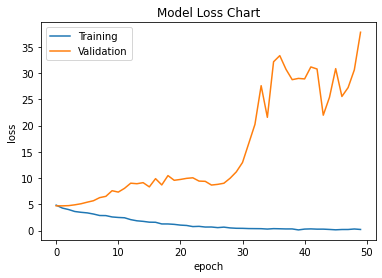

In [16]:
#Loss Chart is being drawn

#Chart Values
plt.plot(trainingHistory.history['loss'])
plt.plot(trainingHistory.history['val_loss'])

#Chart Tittle
plt.title('Model Loss Chart')

#Chart Labels
plt.ylabel('loss')
plt.xlabel('epoch')

#Chart Lines
plt.legend(['Training', 'Validation'], loc='upper left')

#Show Method
plt.show()

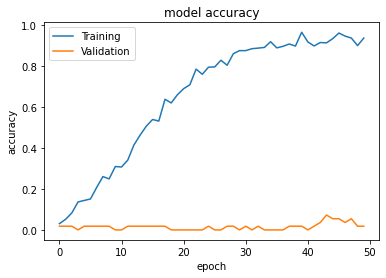

In [17]:
#Loss Chart is being drawn

#Chart Values
plt.plot(trainingHistory.history['accuracy'])
plt.plot(trainingHistory.history['val_accuracy'])

#Chart Tittle
plt.title('model accuracy')

#Chart Labels
plt.ylabel('accuracy')
plt.xlabel('epoch')

#Chart Lines
plt.legend(['Training', 'Validation'], loc='upper left')

#Show Method
plt.show()

In [18]:
#FaceOnly Test data is being read from pkl file
testDf = pd.read_pickle("../../../Data/FirstQuarter/FaceOnly/Test.pkl")
testDf

,PersonID,ImageBGR,DetectionType
0,72,"[[[0, 2, 13], [0, 1, 11], [0, 0, 8], [0, 0, 7]...",SingleFace
1,37,"[[[78, 85, 88], [77, 84, 87], [74, 83, 84], [7...",SingleFace
2,21,"[[[100, 19, 11], [100, 19, 11], [100, 19, 11],...",SingleFace
3,104,"[[[80, 59, 114], [80, 59, 114], [81, 59, 113],...",MultipleFace
4,65,"[[[144, 177, 226], [147, 180, 228], [153, 186,...",SingleFace
5,88,"[[[65, 82, 103], [67, 85, 107], [73, 91, 116],...",SingleFace
6,97,"[[[63, 34, 29], [63, 35, 30], [62, 36, 33], [6...",SingleFace
7,87,"[[[84, 81, 83], [86, 81, 82], [88, 82, 83], [8...",NoFace
8,105,"[[[2, 4, 112], [2, 4, 112], [2, 4, 112], [2, 4...",SingleFace
9,67,"[[[89, 100, 98], [82, 93, 91], [68, 79, 77], [...",SingleFace


In [19]:
#testX is being extracted from testDf as wanted shape
#Pixel values are being converted  to the [-1, 1] range with the simplest method (pixel / 127.5 - 1)
testX = (np.array(testDf.ImageBGR.values.tolist()) / 127.5) - 1
testX.shape

(57, 224, 224, 3)

In [20]:
#testY is being extracted from testDf as wanted shape
testY = np.array(testDf.PersonID.values.tolist()).reshape((-1,1))
testY.shape

(57, 1)

In [21]:
#Model is being evaluated with test data
#Sequence class is being also used for evaluation to convert test data into the same format as training data
testResult = model.evaluate(FitSequence(testX, testY, 16, 1))

4/4 [==============================] - 3s 679ms/step - loss: 31.5635 - accuracy: 0.0175


In [22]:
#Test Loss is being Printed
print('Test Loss: ' + str(testResult[0]))

Test Loss: 31.563493728637695


In [23]:
#Test Accuracy is being Printed
print('Test Accuracy: ' + str(testResult[1]))

Test Accuracy: 0.017543859779834747


# Training4 Inference

By looking at the charts, it can be seen that learning does not take place.

The loss value, decreased as it should for the Training data, while there was no smooth decrease for the Validation data.

The accuracy value, increased as it should for the Training data while there was no smooth increase for the Validation data.

Training accuracy increased above 95% while validation accuracy remained around 5%, this indicates overfitting.

In this case, it can be said that Feature Extraction Layers cannot be trained properly because the number of data is very small.

The Feature Extraction Layers are cannot sufficiently generalize the information obtained from the images.

Performance can be improved by trying Hyperparameter Optimization methods.

See https://en.wikipedia.org/wiki/Hyperparameter_optimization.